# Hilbert-Transformation

Die Hilbert-Transformation wird benötigt, um Einseitenbandsignale zu erzeugen. Sie ist eine lineare Transformation, d.h. es gilt das Superpositionsprinzip. Als Filter betrachtet hat sie die Impulsantwort

\begin{equation}
    h_{\mathrm{H}}(t) = \frac{1}{\pi t}
\end{equation}

und die Übertragungsfunktion

\begin{equation}
    H_{\mathrm{H}}(j \omega) = - j \mathrm{sgn}(\omega) \; .
\end{equation}

Der ideale Hilbert-Transformator ist wegen der Sprungstelle bei $\omega=0$ und der unendlichen Bandbreite nicht realisierbar. Mit einer Bandbegrenzung auf die Grenzkreisfrequenz $\omega_{\mathrm{g}}$ erhalten wir die Übertragungsfunktion

\begin{equation}
    H_{\mathrm{HB}}(j \omega) = 
    \begin{cases}
        - j & \text{für } 0 < \omega \leq \omega_{\mathrm{g}} \\
        + j & \text{für } - \omega_{\mathrm{g}} \leq \omega < 0  \\
        0   & \text{sonst} \; .
       \end{cases} 
\end{equation}

Daraus ergibt sich für den Zeitbereich die Impulsantwort

\begin{align*}
    h_{\mathrm{HB}}(t) 
    &= \frac{1}{2 \pi} \cdot \int_{-\infty}^{\infty} H_{\mathrm{HB}}(j \omega) 
        \cdot e^{j \omega t} d\omega \\
    &= \frac{1}{2 \pi} \cdot \int_{-\omega_{\mathrm{g}}}^{\omega_{\mathrm{g}}}
        - j  \mathrm{sgn}(\omega) \cdot e^{j \omega t} d\omega \\
    &= \frac{j}{2 \pi} \cdot \int_{-\omega_{\mathrm{g}}}^0 e^{j \omega t} d\omega 
     - \frac{j}{2 \pi} \cdot \int_0^{\omega_{\mathrm{g}}} e^{j \omega t} d\omega \\
    &= \frac{j}{j 2 \pi t} \cdot \left( 1 - e^{-j \omega_{\mathrm{g}} t} 
        - (e^{j \omega_{\mathrm{g}} t} -1) \right) \\
    &= \frac{1}{2 \pi t} \cdot \left( 2 - 2 \cos(\omega_{\mathrm{g}} t) \right) \\
    &= \frac{1 - \cos(\omega_{\mathrm{g}} t)}{\pi t} 
\end{align*}

In den folgenden Diagrammen sind die Verläufe der Impulsantworten und Übertragungsfunktionen für den idealen und den bandbegrenzten Hilbert-Transformator dargestellt. Für die Abszissen wurden die normierte Zeit $\omega_{\mathrm{g}}t$ und die normierte Frequenz $\frac{\omega}{\omega_{\mathrm{g}}}$ gewählt.

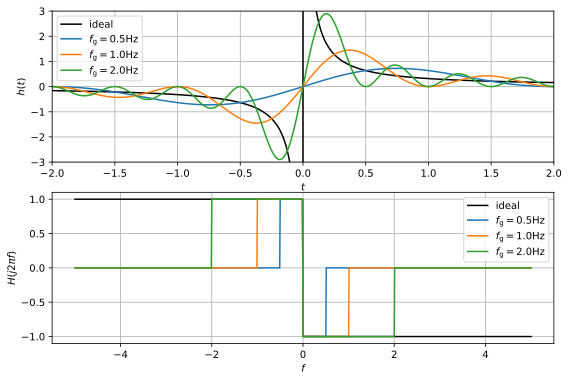

In [2]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(-5,5,1000)
freq = np.linspace(-5,5,1001)
dt = time[1]-time[0]

# ideal Hilbert transform
h_H = np.where(time!=0, 1/(np.pi*time), 0)
H_H = np.where(freq<0, 1, -1)

# bandlimited Hilbert transform
# bandwidths
f_g = [0.5, 1.0, 2.0]
h_HB = np.zeros((len(f_g),len(time)))
H_HB = np.zeros((len(f_g),len(freq)))
for run in np.arange(len(f_g)):
    h_HB[run,:] = np.where(time!=0, (1-np.cos(2*np.pi*f_g[run]*time))/(np.pi * time), 0)
    
    H_HB[run,:] = np.where(freq<0, 1, -1)
    H_HB[run,freq<-f_g[run]] = 0
    H_HB[run,freq>f_g[run]] = 0


fig1 = plt.figure(figsize=(9,6))
ax1a = fig1.add_subplot(211)
ax1a.plot(time,h_H,'k-',label="ideal")
for run in np.arange(len(f_g)):
    ax1a.plot(time,h_HB[run,:],'-',label="$f_{\mathrm{g}}=%3.1f$Hz" %(f_g[run]))
    
plt.xlabel('$t$')
plt.ylabel('$h(t)$')
plt.xlim((-2,2))
plt.ylim((-3,3))
plt.grid(True)
plt.legend()

ax1b = fig1.add_subplot(212)
ax1b.plot(freq,H_H,'k-',label="ideal")
for run in np.arange(len(f_g)):
    ax1b.plot(freq,H_HB[run,:],'-',label="$f_{\mathrm{g}}=%3.1f$Hz" %(f_g[run]))

plt.xlabel('$f$')
plt.ylabel('$H(j 2 \pi f)$')
#plt.xticks(np.append(-f_i,f_i))
plt.grid(True)
plt.legend()

## Hilbert-Transformation einiger spezieller Signale

### Sprungantwort 

Die Antwort des Hilbert-Transformators auf einen Einheitssprung an der Stelle $t=0.5$s wird im unteren Diagramm für den idealen und die bandbegrenzten Varianten dargestellt.

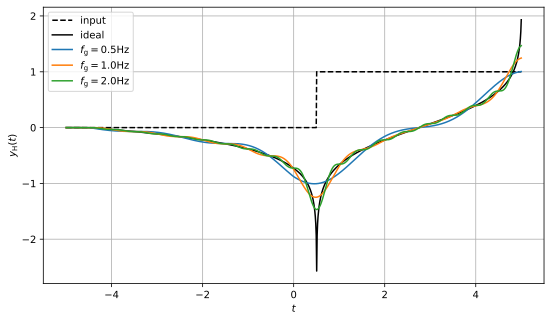

In [3]:
# input signal of Hilbert transform
x_jump = np.where(time>0.5, 1.0, 0.0)

# Hilbert transformed signal
y_H_jump = np.convolve(x_jump,h_H,mode='same') * dt
y_HB_jump = np.zeros((len(f_g),len(time)))
for run in np.arange(len(f_g)):
    y_HB_jump[run,:] = np.convolve(x_jump,h_HB[run,:],mode='same') * dt
    
fig2 = plt.figure(figsize=(9,5))
ax2 = fig2.add_subplot(111)
ax2.plot(time,x_jump,'k--',label="input")
ax2.plot(time,y_H_jump,'k-',label="ideal")
for run in np.arange(len(f_g)):
    ax2.plot(time,y_HB_jump[run,:],'-',label="$f_{\mathrm{g}}=%3.1f$Hz" %(f_g[run]))
    
plt.xlabel('$t$')
plt.ylabel('$y_{\mathrm{H}}(t)$')
#plt.ylim((-10,10))
plt.grid(True)
plt.legend()

### Antwort auf Rechteckimpuls

Die Antwort des idealen und des bandbegrenzten Hilbert-Transformators auf einen Rechteckimpuls ist im unteren Diagramm zusehen. Die Verläufe können als lineare Superposition von zwei verschobenen Sprungantworten interpretiert werden.

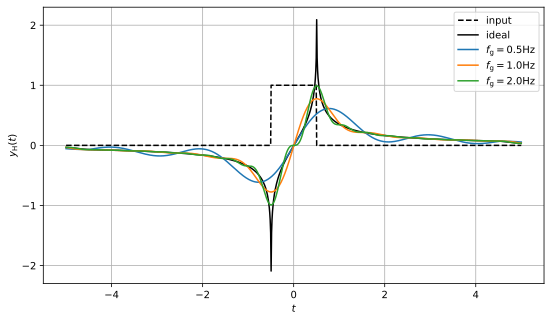

In [4]:
# input signal of Hilbert transform
x_rect = np.where(time>-0.5, 1.0, 0.0) - np.where(time>0.5, 1.0, 0.0)

# Hilbert transformed signal
y_H_rect = np.convolve(x_rect,h_H,mode='same') * dt
y_HB_rect = np.zeros((len(f_g),len(time)))
for run in np.arange(len(f_g)):
    y_HB_rect[run,:] = np.convolve(x_rect,h_HB[run,:],mode='same') * dt
    
fig3 = plt.figure(figsize=(9,5))
ax3 = fig3.add_subplot(111)
ax3.plot(time,x_rect,'k--',label="input")
ax3.plot(time,y_H_rect,'k-',label="ideal")
for run in np.arange(len(f_g)):
    ax3.plot(time,y_HB_rect[run,:],'-',label="$f_{\mathrm{g}}=%3.1f$Hz" %(f_g[run]))
    
plt.xlabel('$t$')
plt.ylabel('$y_{\mathrm{H}}(t)$')
plt.grid(True)
plt.legend()


### Trigonometrische Funktionen 

Für Sinus- und Kosinustöne als Eingangssignale erhalten wir die unteren Zeitverläufe. Es ist zu erkennen, dass der Sinuston in einen negativen Kosinuston transformiert wird, der Kosinuston hingegen in einen Sinuston. 
Außerdem ist sehen wir, dass der Sinuston mit $f_1=1$ Hz bei einer Grenzfrequenz von $f_g=0.5$ Hz unterdrückt wird, während er bei einer Grenzfrequenz von $f_g=2$ Hz wie auch beim idealen Hilbert-Transformator transformiert wird.

Text(0.5, 1.0, '$x(t) = \\cos(\\omega_1 t)$')

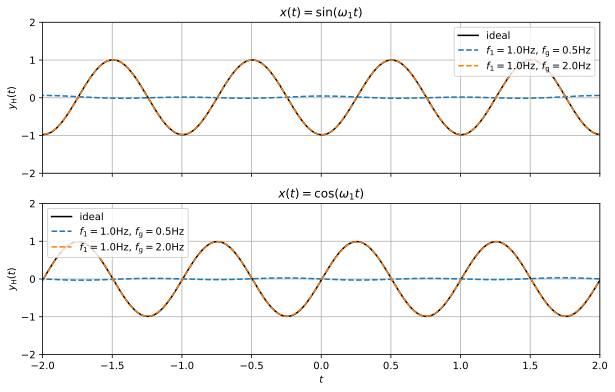

In [5]:
# Frequenzen der Sinustöne in Hz
f_sin = [1.0]

x_sin = np.zeros((len(f_sin),len(time)))
x_cos = np.zeros((len(f_sin),len(time)))
y_H_sin = np.zeros((len(f_sin),len(time)))
y_H_cos = np.zeros((len(f_sin),len(time)))
y_HB_sin = np.zeros((len(f_sin),len(f_g)-1,len(time)))
y_HB_cos = np.zeros((len(f_sin),len(f_g)-1,len(time)))

for run_f1 in np.arange(len(f_sin)):
    x_sin[run_f1,:] = np.sin(2*np.pi*f_sin[run_f1]*time)
    x_cos[run_f1,:] = np.cos(2*np.pi*f_sin[run_f1]*time)

    y_H_sin[run_f1,:] = np.convolve(x_sin[run_f1,:],h_H,mode='same') * dt
    y_H_cos[run_f1,:] = np.convolve(x_cos[run_f1,:],h_H,mode='same') * dt

    for run_fg in np.arange(len(f_g)-1):
        y_HB_sin[run_f1,run_fg,:] = np.convolve(x_sin[run_f1,:],h_HB[run_fg*2,:],mode='same') * dt
        y_HB_cos[run_f1,run_fg,:] = np.convolve(x_cos[run_f1,:],h_HB[run_fg*2,:],mode='same') * dt


fig4 = plt.figure(figsize=(10,6))
ax4a = fig4.add_subplot(211)
for run_f1 in np.arange(len(f_sin)):
    ax4a.plot(time,y_H_sin[run_f1,:],'k-',label="ideal")
    for run_fg in np.arange(len(f_g)-1):
        ax4a.plot(time,y_HB_sin[run_f1,run_fg,:],'--',label="$f_1=%3.1f$Hz, $f_{\mathrm{g}}=%3.1f$Hz" %(f_sin[run_f1],f_g[run_fg*2]))
    
#plt.xlabel('$t$')
ax4a.axes.xaxis.set_ticklabels([])
plt.ylabel('$y_{\mathrm{H}}(t)$')
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.grid(True)
plt.legend()
plt.title('$x(t) = \sin(\omega_1 t)$')

ax4b = fig4.add_subplot(212)
for run_f1 in np.arange(len(f_sin)):
    ax4b.plot(time,y_H_cos[run_f1,:],'k-',label="ideal")
    for run_fg in np.arange(len(f_g)-1):
        ax4b.plot(time,y_HB_cos[run_f1,run_fg,:],'--',label="$f_1=%3.1f$Hz, $f_{\mathrm{g}}=%3.1f$Hz" %(f_sin[run_f1],f_g[run_fg*2]))

plt.xlabel('$t$')
plt.ylabel('$y_{\mathrm{H}}(t)$')
#plt.xticks(np.append(-f_i,f_i))
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.grid(True)
plt.legend()
plt.title('$x(t) = \cos(\omega_1 t)$')
